In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
import sys
%matplotlib inline
import seaborn as sns
sys.path.append("src/eval/plotting")
from plotting.plotutils import *
%load_ext autoreload
%autoreload 2

In [2]:
save_eval_result_dir = "/home/dwalkerhowell3/star_lab/experiments_ca-gnn-marl/eval_saves"
save_plots_path = "/home/dwalkerhowell3/star_lab/ca-gnn-marl/eval/figures"
def models_eval_dict_to_dataframe(models_eval_dict):
    """Convert a dictionary of model evaluations to a dataframe"""
    model_dataframes = []
    for model_name, seed_files in models_eval_dict.items():
        seed_dataframes = []
        for seed_id, seed_eval_file in enumerate(seed_files):
            with open(os.path.join(save_eval_result_dir, seed_eval_file), 'r') as json_file:
                data = json.load(json_file)
                data = pd.DataFrame(data)
                seed_dataframes.append(data)
        seed_eval_df = pd.concat(seed_dataframes)
        seed_eval_df['models'] = model_name
        model_dataframes.append(seed_eval_df)
    model_dfs = pd.concat(model_dataframes)
    model_dfs = model_dfs.reset_index()
    return(model_dfs)


# Comapre Results on Seen vs. Unseen for each model



### New Robots Generalization
Generalization to new robots (resampled) for teams of size 3, 4, 5

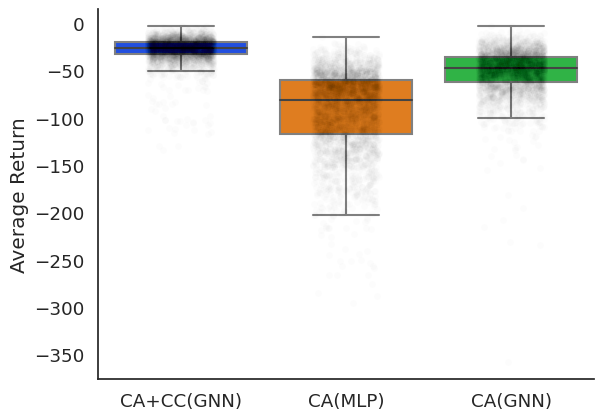

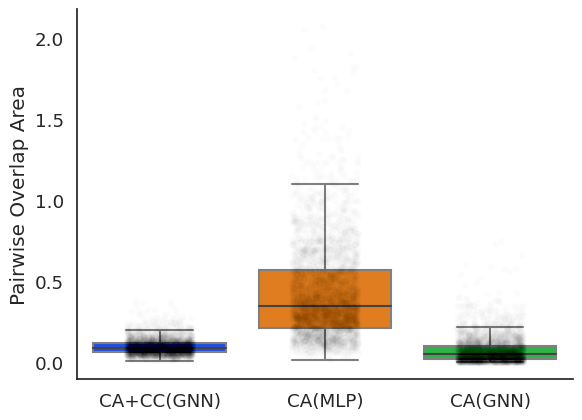

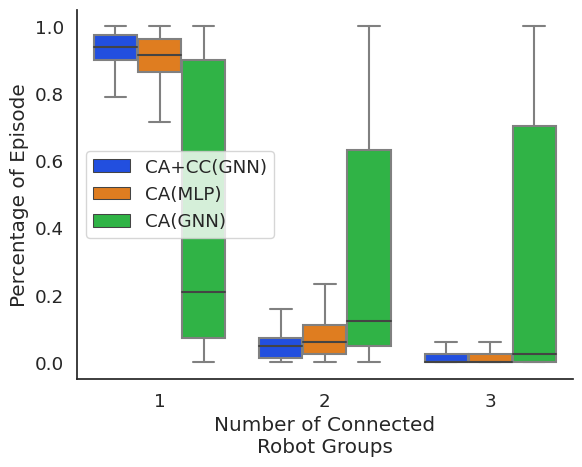

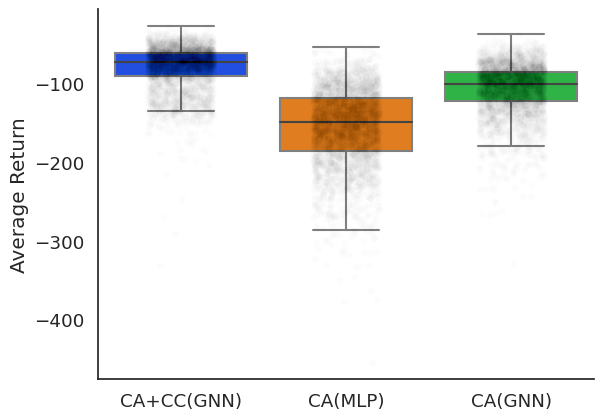

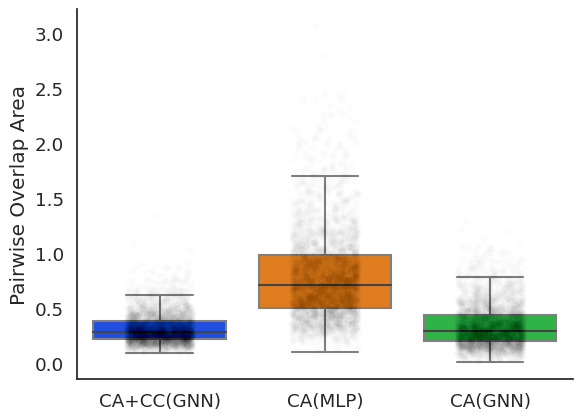

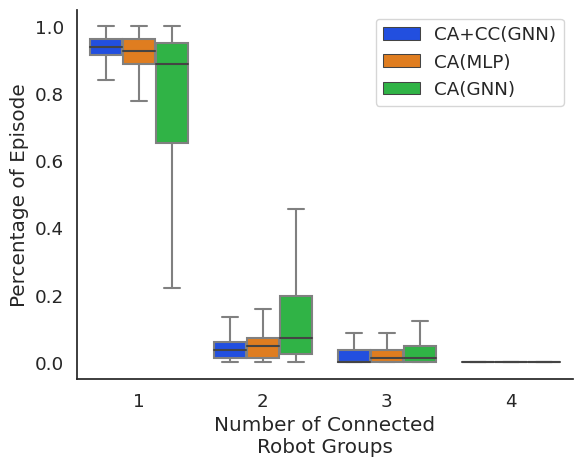

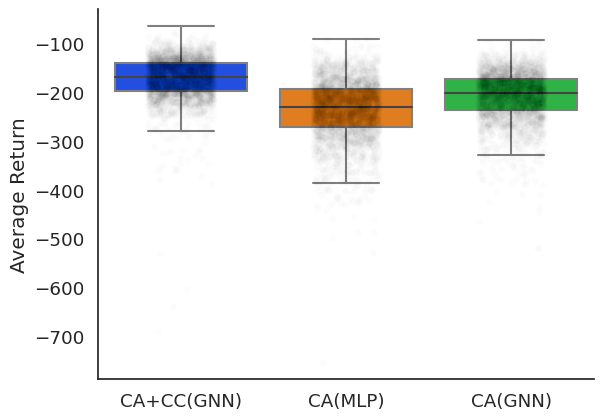

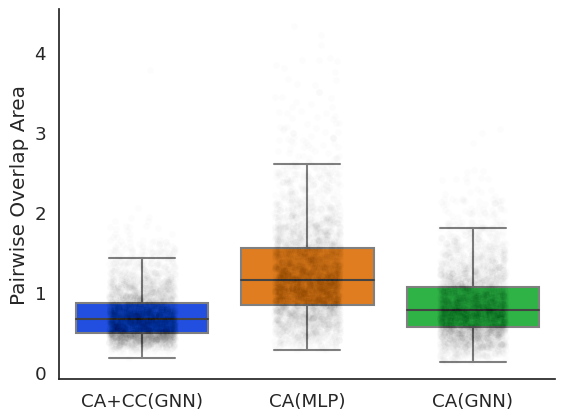

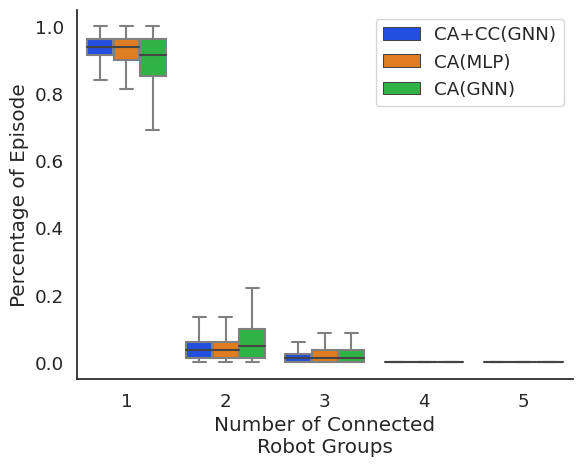

In [3]:
# Eval 1
save_eval_result_dir = "/home/dwalkerhowell3/star_lab/experiments_ca-gnn-marl/eval_saves"
for n_robots in [3, 4, 5]:

    models_eval_dict = {
        "CA+CC(GNN)": [
            f"eval_{n_robots}_agents_unseen_bc_default_SC_4_agents_HSN_sacred_run_1.json",
            f"eval_{n_robots}_agents_unseen_bc_default_SC_4_agents_HSN_sacred_run_2.json",
            f"eval_{n_robots}_agents_unseen_bc_default_SC_4_agents_HSN_sacred_run_3.json"
        ],
        "CA(MLP)": [
            f"eval_{n_robots}_agents_unseen_bc_default_MLP_4_agents_HSN_sacred_run_1.json",
            f"eval_{n_robots}_agents_unseen_bc_default_MLP_4_agents_HSN_sacred_run_2.json",
            f"eval_{n_robots}_agents_unseen_bc_default_MLP_4_agents_HSN_sacred_run_3.json"
        ],
        "CA(GNN)": [
            f"eval_{n_robots}_agents_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_1.json",
            f"eval_{n_robots}_agents_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_2.json",
            f"eval_{n_robots}_agents_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_3.json"
        ]
    }

    evals_df = models_eval_dict_to_dataframe(models_eval_dict)

    boxplot_v0(evals_df, x="models", y="returns", ylabel="Average Return", 
            xlabel="", fig_name=f"new_robots_{n_robots}_robots_avg_return.png", save_path=save_plots_path)

    boxplot_v0(evals_df, x="models", y="overlap", ylabel="Pairwise Overlap Area", 
            xlabel="", fig_name=f"new_robots_{n_robots}_robots_pairwise_overlap.png", save_path=save_plots_path)


    boxplot_connected_components(evals_df, ylabel="Percentage of Episode", 
            xlabel="Number of Connected\nRobot Groups", fig_name=f"new_robots_{n_robots}_robots_connected_components.png", save_path=save_plots_path)



### New Teams with Trained Agents Generalization
In this evaluation, we sample new teams from the 20 robots in the training set of robots. This allows comparison with the ID methods

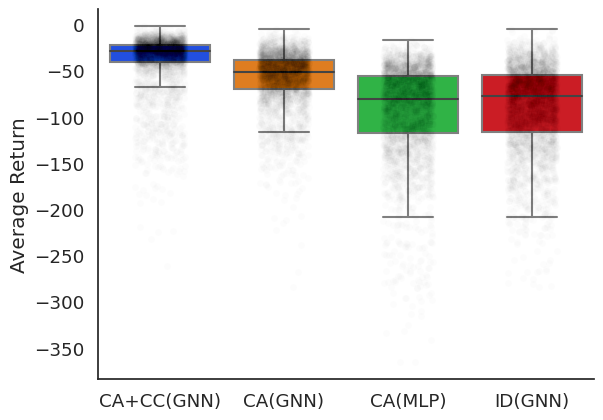

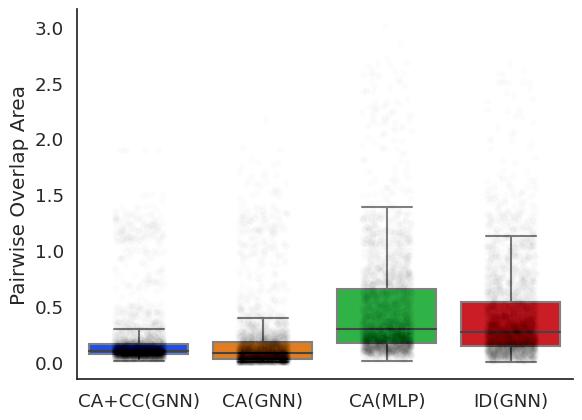

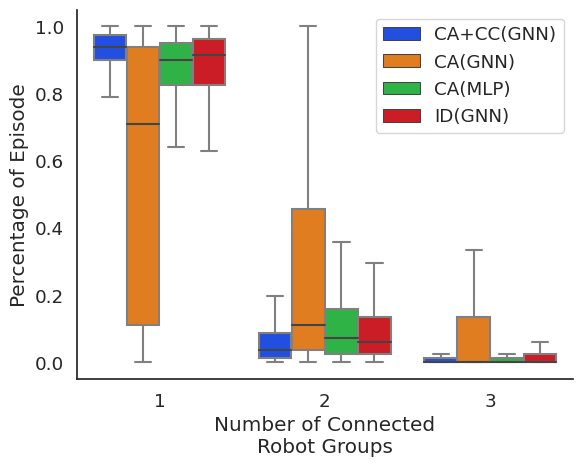

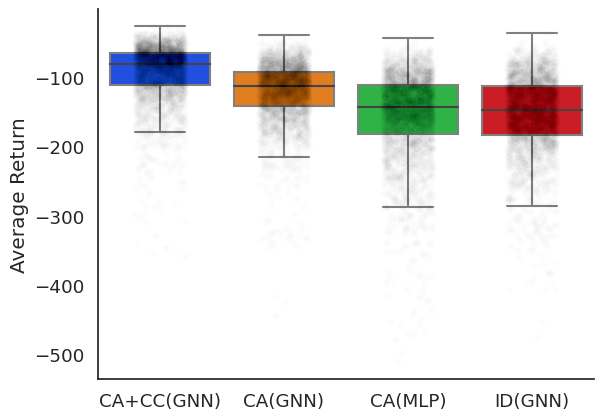

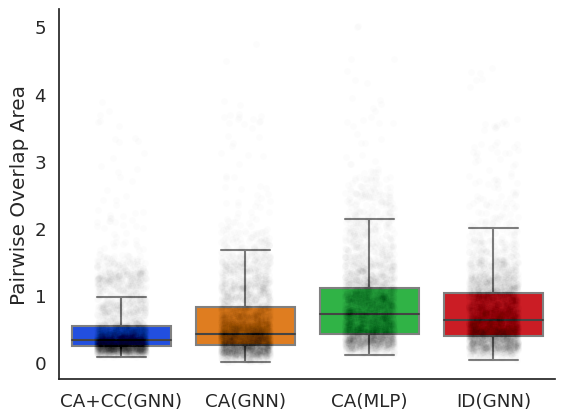

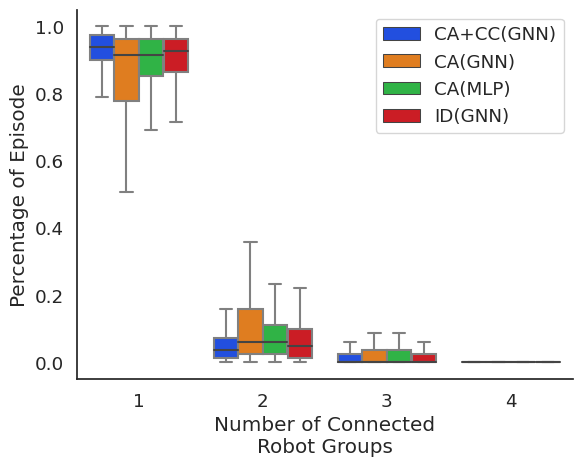

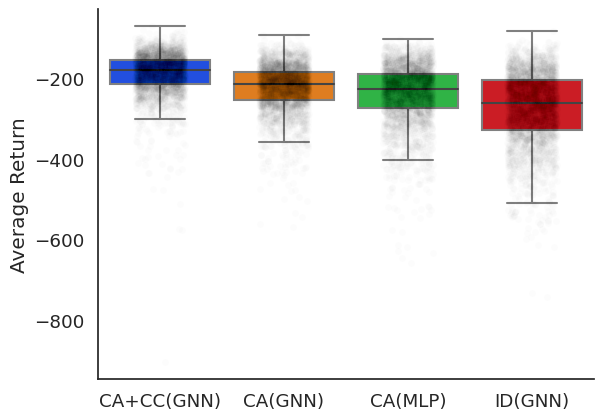

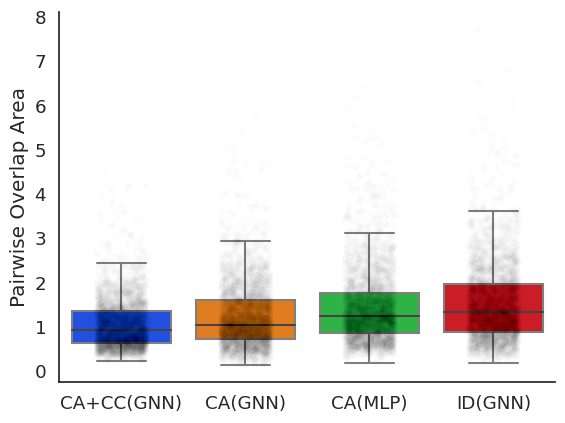

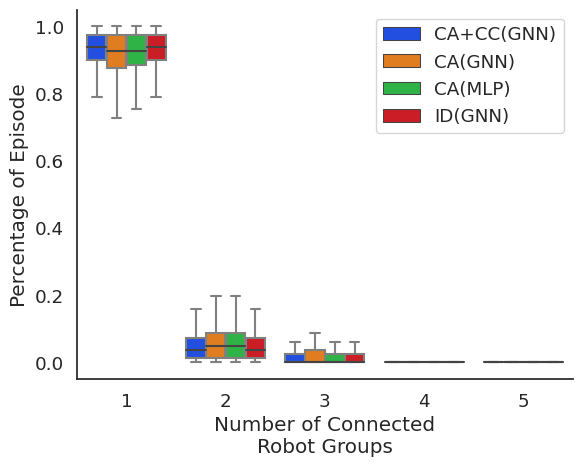

In [4]:
# Evaluation on UNSEEN TEAMS
save_eval_result_dir = "/home/dwalkerhowell3/star_lab/experiments_ca-gnn-marl/eval_saves"
for n_robots in [3, 4, 5]:
    models_eval_dict = {
        "CA+CC(GNN)": [
            f"eval_{n_robots}_agents_CA_unseen_bc_default_SC_4_agents_HSN_sacred_run_1.json",
            f"eval_{n_robots}_agents_CA_unseen_bc_default_SC_4_agents_HSN_sacred_run_2.json",
            f"eval_{n_robots}_agents_CA_unseen_bc_default_SC_4_agents_HSN_sacred_run_3.json"
        ],
        "CA(GNN)": [
            f"eval_{n_robots}_agents_CA_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_1.json",
            f"eval_{n_robots}_agents_CA_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_2.json",
            f"eval_{n_robots}_agents_CA_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_3.json"
        ],
        "CA(MLP)": [
            f"eval_{n_robots}_agents_CA_unseen_bc_default_MLP_4_agents_HSN_sacred_run_1.json",
            f"eval_{n_robots}_agents_CA_unseen_bc_default_MLP_4_agents_HSN_sacred_run_2.json",
            f"eval_{n_robots}_agents_CA_unseen_bc_default_MLP_4_agents_HSN_sacred_run_3.json"
        ],
        "ID(GNN)": [
            f"eval_{n_robots}_agents_ID_unseen_bc_default_SC_ID_4_agents_REDO_sacred_run_1.json",
            f"eval_{n_robots}_agents_ID_unseen_bc_default_SC_ID_4_agents_REDO_sacred_run_2.json",
            f"eval_{n_robots}_agents_ID_unseen_bc_default_SC_ID_4_agents_REDO_sacred_run_3.json"
        ],
        "ID(MLP)": [
            f"eval_{n_robots}_agents_ID_unseen_bc_default_MLP_ID_4_agents_HSN_sacred_run_1.json",
            f"eval_{n_robots}_agents_ID_unseen_bc_default_MLP_ID_4_agents_HSN_sacred_run_2.json",
            f"eval_{n_robots}_agents_ID_unseen_bc_default_MLP_ID_4_agents_HSN_sacred_run_3.json"
        ]
    }

    evals_df = models_eval_dict_to_dataframe(models_eval_dict)

    boxplot_v0(evals_df, x="models", y="returns", ylabel="Average Return", 
            xlabel="", fig_name=f"new_teams_only_{n_robots}_robots_avg_return.png", save_path=save_plots_path)

    boxplot_v0(evals_df, x="models", y="overlap", ylabel="Pairwise Overlap Area", 
            xlabel="", fig_name=f"new_teams_only_{n_robots}_robots_overlap.png", save_path=save_plots_path)


    boxplot_connected_components(evals_df, ylabel="Percentage of Episode", 
            xlabel="Number of Connected\nRobot Groups", fig_name=f"new_teams_only_{n_robots}_robots_connected_components.png", save_path=save_plots_path)



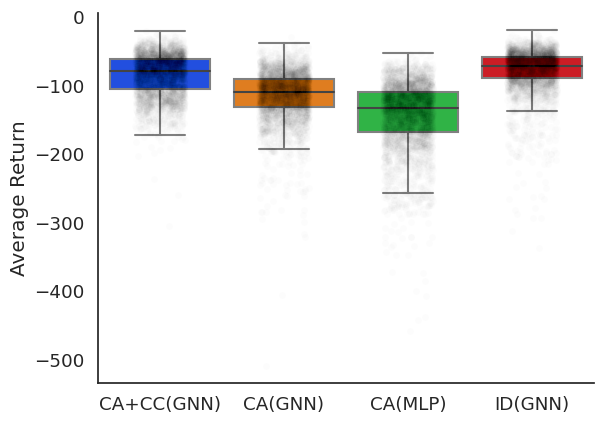

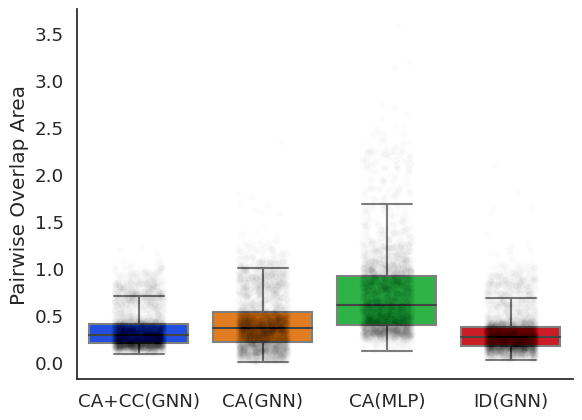

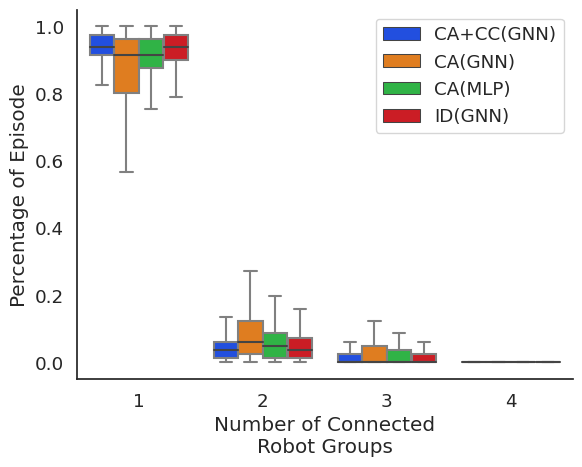

In [5]:
# Evaluation on SEEN TEAMS (THIS IS ONLY FOR 4 ROBOTS.) This is like a proper evaluation
# on the real training set for all models
save_eval_result_dir = "/home/dwalkerhowell3/star_lab/experiments_ca-gnn-marl/eval_saves"
for n_robots in [4]:
    models_eval_dict = {
        "CA+CC(GNN)": [
            f"eval_{n_robots}_agents_seen_bc_default_SC_4_agents_HSN_sacred_run_1.json",
            f"eval_{n_robots}_agents_seen_bc_default_SC_4_agents_HSN_sacred_run_2.json",
            f"eval_{n_robots}_agents_seen_bc_default_SC_4_agents_HSN_sacred_run_3.json"
        ],
        "CA(GNN)": [
            f"eval_{n_robots}_agents_seen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_1.json",
            f"eval_{n_robots}_agents_seen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_2.json",
            f"eval_{n_robots}_agents_seen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_3.json"
        ],
        "CA(MLP)": [
            f"eval_{n_robots}_agents_seen_bc_default_MLP_4_agents_HSN_sacred_run_1.json",
            f"eval_{n_robots}_agents_seen_bc_default_MLP_4_agents_HSN_sacred_run_2.json",
            f"eval_{n_robots}_agents_seen_bc_default_MLP_4_agents_HSN_sacred_run_3.json"
        ],
        "ID(GNN)": [
            f"eval_{n_robots}_agents_ID_seen_bc_default_SC_ID_4_agents_REDO_sacred_run_1.json",
            f"eval_{n_robots}_agents_ID_seen_bc_default_SC_ID_4_agents_REDO_sacred_run_2.json",
            f"eval_{n_robots}_agents_ID_seen_bc_default_SC_ID_4_agents_REDO_sacred_run_3.json"
        ],
        "ID(MLP)": [
            f"eval_{n_robots}_agents_ID_seen_bc_default_MLP_ID_4_agents_HSN_sacred_run_1.json",
            f"eval_{n_robots}_agents_ID_seen_bc_default_MLP_ID_4_agents_HSN_sacred_run_2.json",
            f"eval_{n_robots}_agents_ID_seen_bc_default_MLP_ID_4_agents_HSN_sacred_run_3.json"
        ]
    }

    evals_df = models_eval_dict_to_dataframe(models_eval_dict)

    boxplot_v0(evals_df, x="models", y="returns", ylabel="Average Return", 
            xlabel="", fig_name=f"training_teams_only_{n_robots}_robots_avg_return.png", save_path=save_plots_path)

    boxplot_v0(evals_df, x="models", y="overlap", ylabel="Pairwise Overlap Area", 
            xlabel="", fig_name=f"training_teams_only_{n_robots}_robots_overlap.png", save_path=save_plots_path)


    boxplot_connected_components(evals_df, ylabel="Percentage of Episode", 
            xlabel="Number of Connected\nRobot Groups", fig_name=f"training_teams_only_{n_robots}_robots_connected_components.png", save_path=save_plots_path)

